Assignment 3, Aslan Smagulov

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def f(x):
    return 2*(math.sin((x)**(1/2)))-x+1


In [0]:
def df(x):
    return 2*math.cos((x)**(1/2))*1/2*x**(-1/2)-1

In [0]:
def g(x):
    return 2*(math.sin((x)**(1/2)))+1

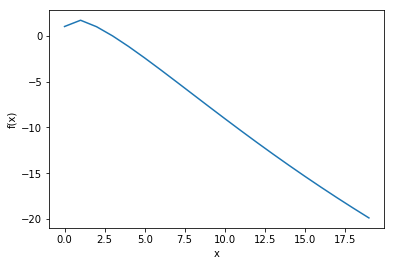

In [0]:
c=[]
d=[]
for i in range (0,20):
    d.append(i)
    y=f(i)
    c.append(y)
plt.plot(d,c)    
plt.ylabel("f(x)")
plt.xlabel("x")
plt.show()

So the actual root is about 1

In [0]:
def bisection(xl,xu,itmax,pr):
    a=[]
    b=[]
    c=[]
    mid=1 #approximately by hand calculation
    for i in range (itmax):
        root=mid
        a.append(i)
        mid=1/2*(xl+xu)
        b.append(mid)
        if mid!=0:
            
            error= abs((mid-root)/mid)*100
            c.append(error)
        if f(xl)*f(xu)<0:
            xu=mid
        elif f(xl)*f(xu)>0:
            xl=mid
        else:
            error=0
        if error<pr:
            break
            
    return a,b,c  
    

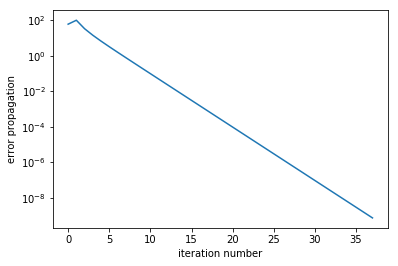

In [0]:
a1,b1,c1=bisection(0,5,50,1e-9)
plt.plot(a1,c1)
plt.ylabel("error propagation")
plt.xlabel("iteration number")
plt.yscale('log')
plt.show()

In [0]:
def falsepos(xl,xu,itmax,pr):
    a=[]
    b=[]
    c=[]
    mid=1 #approximately by hand calculation
    for i in range (itmax):
        root=mid
        a.append(i)
        mid=xu+f(xu)*(xl-xu)/(f(xu)-f(xl))
        b.append(mid)
        if mid!=0:
            
            error= abs((mid-root)/mid)*100
            c.append(error)
        
        if f(xl)*f(xu)<0:
            xu=mid
        elif f(xl)*f(xu)>0:
            xl=mid
        else:
            error=0
        if error<pr:
            break
            
    return a,b,c  

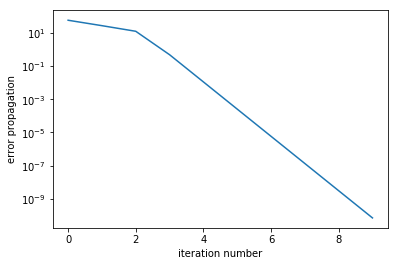

In [0]:
a2,b2,c2=falsepos(0.5,5,50,1e-9)
plt.plot(a2,c2)
plt.ylabel("error propagation")
plt.xlabel("iteration number")
plt.yscale('log')
plt.show()

In [0]:
def fpi(guess,itmax,pr):
    a=[]
    b=[]
    c=[]
    mid=guess 
    for i in range (itmax):
        root=mid
        mid=g(root)
        a.append(i)
        
        b.append(mid)
        if mid!=0:
            
            error=abs((mid-root)/mid)*100
            c.append(error)
        if error<pr:
            break
            
    return a,b,c  
    

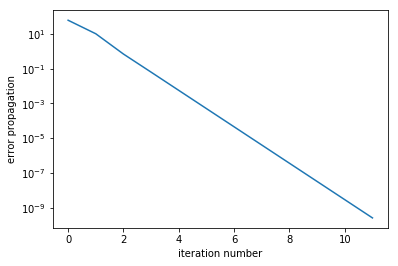

In [0]:
a3,b3,c3=fpi(1,50,1e-9)
plt.plot(a3,c3)

plt.ylabel("error propagation")
plt.xlabel("iteration number")
plt.yscale('log')
plt.show()

In [0]:
def newton(guess,itmax,pr):
    a=[]
    b=[]
    c=[]
    mid=guess 
    for i in range (itmax):
        root=mid
        mid=root-f(root)/df(root)
        a.append(i)
        
        b.append(mid)
        if mid!=0:
            
            error=abs((mid-root))/mid
            c.append(error)
        if error<pr:
            break
            
    return a,b,c  
    


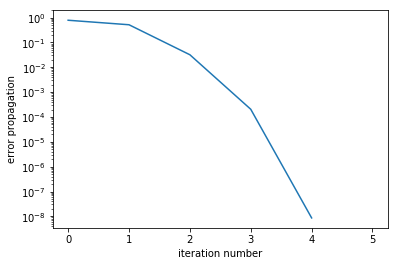

In [0]:
a4,b4,c4=newton(1,50,1e-9)
plt.plot(a4,c4)
plt.ylabel("error propagation")
plt.xlabel("iteration number")
plt.yscale('log')
plt.show()

Speed correlation: Newton-Raphson > False-Position > Fixed-Point Iteration > Bisection

For Bracketing methods(Bisection and False-Position), the initial interval is not cause of slower convergence than open methods, because however the interval is, it will eventually become sharply small at the beginning by being halved each time, and when it gets closer to the actual root, serious work starts by comparing each value of multiplication in each interval to choose the new boundaries. The Newton-Raphson method is the fastest because it considers not the value of a function at a certain point ,like in Fixed-Point iteration, but works with derivatives and tangent of lines directly  extracting the corresponding x(i+1) term from the condition containing x(i)term. False-Position method is faster than bisection method due to simpler graphical algorithm which allows to draw the line connecting two end points and find the value of a function at the intersection point(f(x)=0), and decide upon given conditions what are the new boundaries. It also makes problem that the initial function contains sin function, which could contribute to the slower convergence in all 4 methods especially in bisection and fixed-point iteration.Instead of sin function some other quadratic,cubic or exponential functions would be better for all methods, since at two neighbor points which do not differ by much, the difference of function(their derivatives,as well) values at these points would be greater than that in triginometric functions, and it would lead to the faster convergence rate.

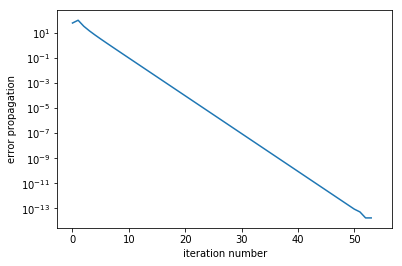

In [0]:
a1,b1,c1=bisection(0,5,150,1e-15)
plt.plot(a1,c1)
plt.ylabel("error propagation")
plt.xlabel("iteration number")
plt.yscale('log')
plt.show()


For Bisection method the maximum absolute error is about 10e-12

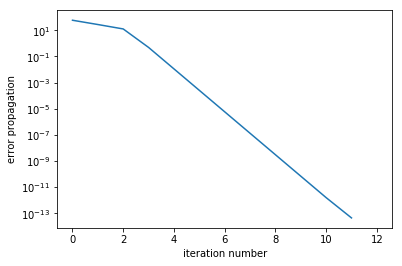

In [0]:
a2,b2,c2=falsepos(0.5,5,50,1e-15)
plt.plot(a2,c2)
plt.ylabel("error propagation")
plt.xlabel("iteration number")
plt.yscale('log')
plt.show()

Maximum absolute error for False-Position  method is about 10e-11

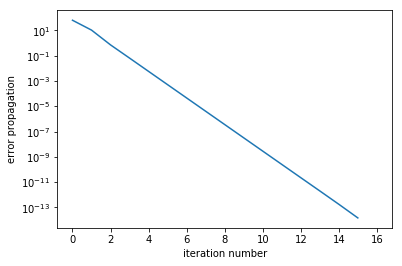

In [0]:
a3,b3,c3=fpi(1,50,1e-15)
plt.plot(a3,c3)

plt.ylabel("error propagation")
plt.xlabel("iteration number")
plt.yscale('log')
plt.show()

Also for Fixed-Point iteration the maximum absolute error is 10e-11

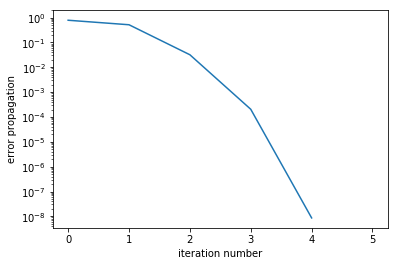

In [0]:
a4,b4,c4=newton(1,50,1e-15)
plt.plot(a4,c4)
plt.ylabel("error propagation")
plt.xlabel("iteration number")
plt.yscale('log')
plt.show()

While the Newton-Raphson method is the fastest one, the maximum absolute error is much  bigger than in other methods it is about 10e-6